In [1]:
from qiskit import *
%matplotlib inline
from numpy import * 
version_info = qiskit.__qiskit_version__
print("You are now running Qiskit with the following version numbers")
print(version_info)

You are now running Qiskit with the following version numbers
{'qiskit-terra': '0.9.0', 'qiskit-ignis': '0.2.0', 'qiskit': '0.12.0', 'qiskit-aer': '0.3.0', 'qiskit-ibmq-provider': '0.3.2', 'qiskit-aqua': '0.6.0'}


In [2]:
qc = QuantumCircuit(3, 3)

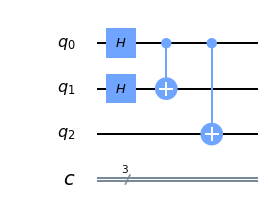

In [3]:
qc.h([0, 1])
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw(output='mpl')

[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]


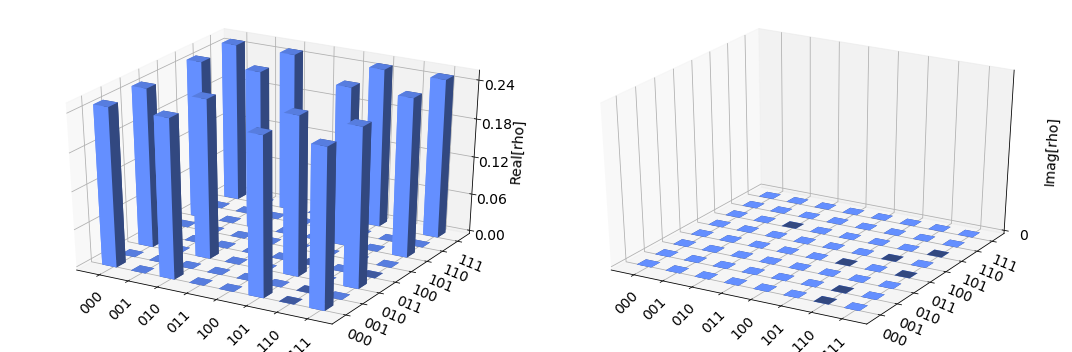

In [4]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# # Create a Quantum Program for execution 
job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

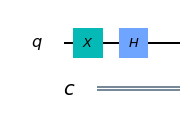

In [5]:
# Question 2
#--------------------
qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.h(0)
qc1.draw(output='mpl')



In [6]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# # Create a Quantum Program for execution 
job = execute(qc1, backend)

result = job.result()

outputstate = result.get_statevector(qc1, decimals=3)
print(outputstate)

[ 0.707+0.j -0.707+0.j]


In [7]:
tpl_circuit = QuantumCircuit(5)
tpl_circuit.h(3)
tpl_circuit.cx(0, 4)
tpl_circuit.cx(3, 0)

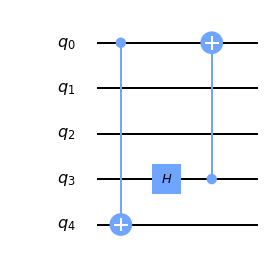

In [8]:
tpl_circuit.draw(output='mpl')

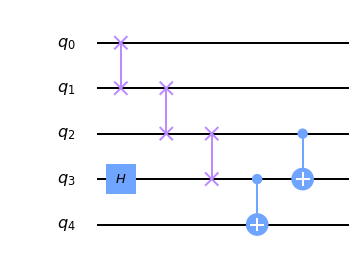

In [9]:
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasicSwap
from qiskit.compiler import transpile
from qiskit import Aer


coupling = [[0, 1], [1, 2], [2, 3], [3, 4]]

simulator = Aer.get_backend('qasm_simulator')
coupling_map = CouplingMap(couplinglist=coupling)
pass_manager = PassManager()
pass_manager.append([BasicSwap(coupling_map=coupling_map)])
basic_circ = transpile(tpl_circuit, simulator, pass_manager=pass_manager)
basic_circ.draw(output="mpl")

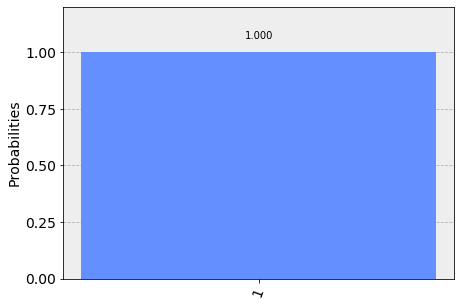

In [10]:
from qiskit.tools.visualization import plot_histogram

a = '1'
b = '1'

qc4 = QuantumCircuit(3,1)
if a=='1':
    qc4.x(0)
if b=='1':
    qc4.x(1)
qc4.cx(1,0)
qc4.cx(2,0)
qc4.x(0)
qc4.measure(0,0)


# qc3.draw(output='mpl')

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc4, backend = simulator).result()
plot_histogram(result.get_counts(qc4))

In [11]:
# Learn
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
%matplotlib inline



qc = QuantumCircuit(3, 2)

qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)


print(qc.qregs)
print(qc.cregs)




bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0, 1], [0, 1])

bell.draw()







[QuantumRegister(3, 'q')]
[ClassicalRegister(2, 'c')]


In [12]:


qr1 = QuantumRegister(1, 'q1')
qr2 = QuantumRegister(1, 'q2')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr2, qr1, cr)

print('Qubit ordering:', circuit.qubits)
print('Classical bit ordering:', circuit.clbits)

circuit.h([1,0])
circuit.measure(1, [0,1])
circuit.draw()

Qubit ordering: [Qubit(QuantumRegister(1, 'q2'), 0), Qubit(QuantumRegister(1, 'q1'), 0)]
Classical bit ordering: [Clbit(ClassicalRegister(2, 'c'), 0), Clbit(ClassicalRegister(2, 'c'), 1)]


In [13]:
# Portable Instructions and CompositeGate replacement


from qiskit.circuit import Gate

my_gate = Gate(name='my_gate', num_qubits=2, params=[])
qr = QuantumRegister(3, 'q')

circ = QuantumCircuit(qr)

# An append(instruction, qargs, cargs) method has been added to the QuantumCircuit class, 
# which takes an anonymous Instruction instance and attaches it to the circuit at the 
# specified qargs and cargs.

circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw()



In [14]:
# Compostite gate -  
# -----------------
# Composite gates and complex circuit components can now be constructed and managed as independent QuantumCircuits and, through the to_instruction method, converted to Instructions to be appended to a target circuit at a given location.

# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.iden(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

sub_circ.draw()






In [15]:
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [q[1], q[2]])

circ.draw()

In [16]:


decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw()



In [17]:

# 3. Parameterized circuits
# Parameterization is a common feature of many quantum algorithms, as well as a standard building block for 
# constructing libraries of standard gates and subcircuits.
# Terra 0.8 introduces a Parameter class that can be used to specify a placeholder wherever a numeric parameter 
# can be used.
# In the following example, we want to quickly construct a series of experiments that vary the angle of a
# global $R_z$ rotation over a set of entangled qubits.


from qiskit.circuit import Parameter

theta = Parameter('0')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

print(qc.parameters)
qc.draw()

{Parameter(0)}


In [18]:
# Binding parameters to values

# All circuit parameters must be bound before sending the circuit to a backend. This can be done in one of two ways:

# The bind_parameters method accepts a dictionary mapping Parameters to values, 
# and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported,
# in which case the returned circuit will be parameterized by any Parameters that were not mapped to a value.


import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

print(circuits[-1].draw(line_length=120))
print(circuits[-1].parameters)
                                                                                           
# set()
# qiskit.execute now accepts a parameter_binds keyword argument which, when specified as a list of dictionaries mapping Parameters to values, will bind and execute a circuit on the backend for every mapping dictionary in the list.





        ┌───┐                     ░ ┌──────────────────────┐ ░                     ┌───┐┌─┐
q_0: |0>┤ H ├──■──────────────────░─┤ Rz(6.28318530717959) ├─░──────────────────■──┤ H ├┤M├
        └───┘┌─┴─┐                ░ ├──────────────────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: |0>─────┤ X ├──■─────────────░─┤ Rz(6.28318530717959) ├─░─────────────■──┤ X ├──────╫─
             └───┘┌─┴─┐           ░ ├──────────────────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: |0>──────────┤ X ├──■────────░─┤ Rz(6.28318530717959) ├─░────────■──┤ X ├───────────╫─
                  └───┘┌─┴─┐      ░ ├──────────────────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: |0>───────────────┤ X ├──■───░─┤ Rz(6.28318530717959) ├─░───■──┤ X ├────────────────╫─
                       └───┘┌─┴─┐ ░ ├──────────────────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: |0>────────────────────┤ X ├─░─┤ Rz(6.28318530717959) ├─░─┤ X ├─────────────────────╫─
                            └───┘ ░ └──────────────────────┘ ░ └───┘            

In [19]:
# qiskit.execute now accepts a parameter_binds keyword argument which, when
# specified as a list of dictionaries mapping Parameters to values, will
# bind and execute a circuit on the backend for every mapping dictionary in the list.


from qiskit import BasicAer, execute

job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range])

# Note: Bind labels are not presrved in executed experiments.
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]



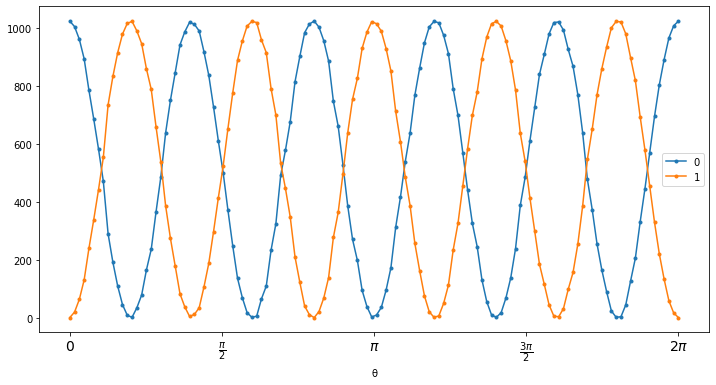

In [20]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1') 

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ')
ax.legend()



In [21]:

# import time
# from itertools import combinations
# from qiskit.compiler import transpile, assemble
# from qiskit.test.mock import FakeTokyo

# start = time.time()
# qcs = []

# theta_range = np.linspace(0, 2*np.pi, 32)

# for n in theta_range:
#     qc = QuantumCircuit(5)

#     for k in range(8):
#         for i,j in combinations(range(5), 2):
#             qc.cx(i,j)
#         qc.rz(n, range(5))
#         for i,j in combinations(range(5), 2):
#             qc.cx(i,j)

#     qcs.append(qc)
    
# compiled_circuits = transpile(qcs, backend=FakeTokyo())
# qobj = assemble(compiled_circuits, backend=FakeTokyo())

# end = time.time()
# print('Time compiling over set of bound circuits: ', end-start)



In [22]:


# start = time.time()
# qc = QuantumCircuit(5)
# theta = Parameter('theta')

# for k in range(8):
#     for i,j in combinations(range(5), 2):
#         qc.cx(i,j)
#     qc.rz(theta, range(5))
#     for i,j in combinations(range(5), 2):
#         qc.cx(i,j)

# transpiled_qc = transpile(qc, backend=FakeTokyo())
# qobj = assemble([transpiled_qc.bind_parameters({theta: n})
#                  for n in theta_range], backend=FakeTokyo())
# end = time.time()
# print('Time compiling over parameterized circuit, then binding: ', end-start)



In [23]:

# Composition

# Parameterized circuits can be composed like standard QuantumCircuits. Generally, when composing two parameterized circuits, the resulting circuit will be parameterized by the union of the parameters of the input circuits.

# However, parameter names must be unique within a given circuit. When attempting to add a parameter whose name is already present in the target circuit:

#     if the source and target share the same Parameter instance, the parameters will be assumed to be the same and combined
#     if the source and target have different Parameter instances, an error will be raised

phi = Parameter('phi')

sub_circ1 = QuantumCircuit(2, name='sc_1')
sub_circ1.rz(phi, 0)
sub_circ1.rx(phi, 1)

sub_circ2 = QuantumCircuit(2, name='sc_2')
sub_circ2.rx(phi, 0)
sub_circ2.rz(phi, 1)

qc = QuantumCircuit(4)
qr = qc.qregs[0]

qc.append(sub_circ1.to_instruction(), [qr[0], qr[1]])
qc.append(sub_circ2.to_instruction(), [qr[0], qr[1]])

qc.append(sub_circ2.to_instruction(), [qr[2], qr[3]])

print(qc.draw())

# The following raises an error: "QiskitError: 'Name conflict on adding parameter: phi'"
# phi2 = Parameter('phi')
# qc.u3(0.1, phi2, 0.3, 0)



        ┌────────────┐┌────────────┐
q_0: |0>┤0           ├┤0           ├
        │  sc_1(phi) ││  sc_2(phi) │
q_1: |0>┤1           ├┤1           ├
        ├────────────┤└────────────┘
q_2: |0>┤0           ├──────────────
        │  sc_2(phi) │              
q_3: |0>┤1           ├──────────────
        └────────────┘              


In [24]:


import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright



In [25]:


# To insert a subcircuit under a different parameterization, the to_instruction method accepts an 
#optional argument (parameter_map) which, when present, will generate instructions with the source 
#parameter replaced by a new parameter.
# In [19]:

p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
print(larger_qc.draw())

print(larger_qc.decompose().draw())



         ┌────────────────┐
q1_0: |0>┤0               ├
         │                │
q1_1: |0>┤1 oracle(theta) ├
         │                │
q1_2: |0>┤2               ├
         └┬──────────────┬┘
q1_3: |0>─┤0             ├─
          │              │ 
q1_4: |0>─┤1 oracle(phi) ├─
          │              │ 
q1_5: |0>─┤2             ├─
         ┌┴──────────────┴┐
q1_6: |0>┤0               ├
         │                │
q1_7: |0>┤1 oracle(gamma) ├
         │                │
q1_8: |0>┤2               ├
         └────────────────┘
         ┌───────────┐                                    
q1_0: |0>┤ Rz(theta) ├──■─────────────────────────────────
         └───────────┘┌─┴─┐┌───────────┐                  
q1_1: |0>─────────────┤ X ├┤ Rz(theta) ├──■───────────────
                      └───┘└───────────┘┌─┴─┐┌───────────┐
q1_2: |0>───────────────────────────────┤ X ├┤ Rz(theta) ├
          ┌─────────┐                   └───┘└───────────┘
q1_3: |0>─┤ Rz(phi) ├───■──────────────────────────────

In [26]:
# The Unique Properties of Qubit

measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)
measure_z.draw(output='mpl')
simulator = Aer.get_backend('qasm_simulator')

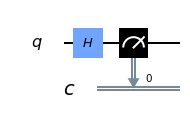

In [27]:

measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

measure_x.draw(output='mpl')




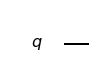

In [28]:


qc_0 = QuantumCircuit(1)
qc_0.draw(output='mpl')



Results for z measurement:


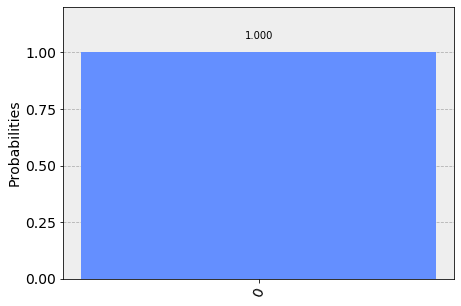

In [29]:
qc = qc_0 +  measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Results for x measurement:


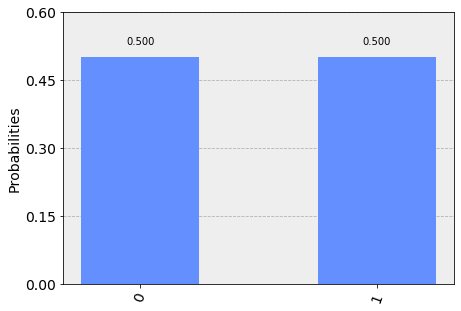

In [30]:


qc = qc_0 +  measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)



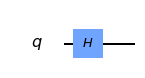

In [31]:
# Now we'll try a different circuit, that will give use very different behaviour.

qc_plus = QuantumCircuit(1)
qc_plus.h(0)

qc_plus.draw(output='mpl')



Results for z measurement:


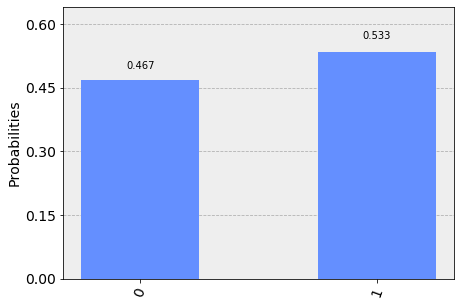

In [32]:
qc = qc_plus + measure_z

qc.draw()

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Results for z measurement:


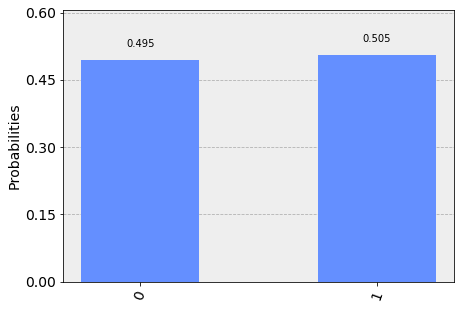

In [33]:
qc = qc_plus + measure_z

qc.draw()

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

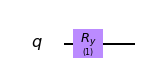

In [34]:
qc_y = QuantumCircuit(1)
qc_y.ry(1,0)

qc_y.draw(output='mpl')

Results for z measurement:


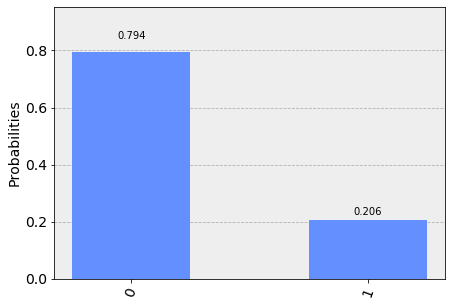

In [35]:
qc = qc_y + measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)



Results for z measurement:


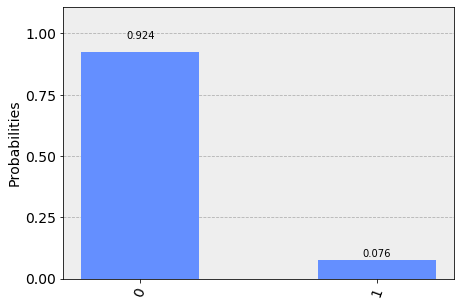

In [36]:
qc = qc_y + measure_x

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


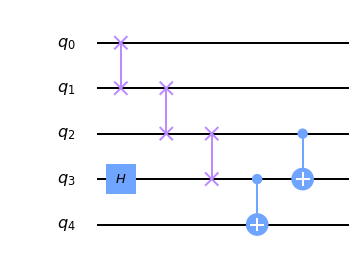

In [37]:
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import BasicSwap
from qiskit.compiler import transpile
from qiskit import Aer

 
tpl_circuit = QuantumCircuit(5)
tpl_circuit.h(3)
tpl_circuit.cx(0, 4)
tpl_circuit.cx(3, 0)

coupling = [[0, 1], [1, 2], [2, 3], [3, 4]]

simulator = Aer.get_backend('qasm_simulator')
coupling_map = CouplingMap(couplinglist=coupling)
pass_manager = PassManager()
pass_manager.append([BasicSwap(coupling_map=coupling_map)])
basic_circ = transpile(tpl_circuit, simulator, pass_manager=pass_manager)
basic_circ.draw(output="mpl")

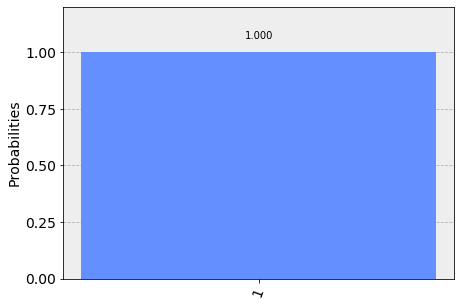

In [38]:
a='1'
b='0'

qc1 = QuantumCircuit(3,1)
if a=='1':
    qc1.x(0)
if b=='1':
    qc1.x(1)
qc1.x(0)
qc1.x(1)
qc1.ccx(0,1,2)
qc1.x(2)
qc1.measure(2,0)

counts = execute(qc1,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

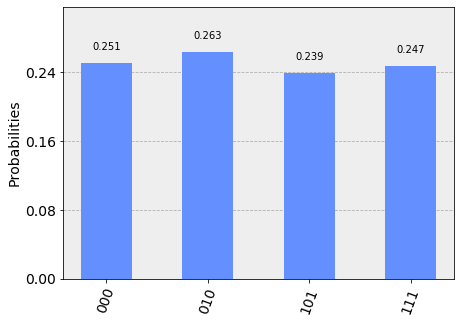

In [39]:
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.h(1)
circ.cx(0, 1)
circ.cx(0, 2)
circ.measure([0,1,2],[0,1,2])

simulator = Aer.get_backend('qasm_simulator')

result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts)

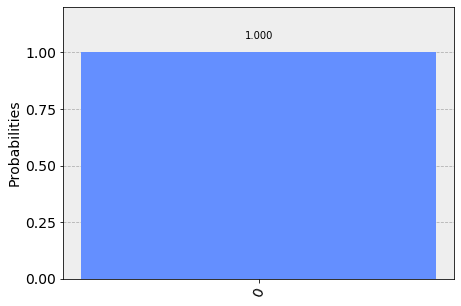

In [40]:

qc = QuantumCircuit(1,1)

#qc.h(0)

#qc.rx(np.pi/2,0)

# qc.sdg(0)

# qc.x(0)
#-------------




qc.measure(0,0)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts)



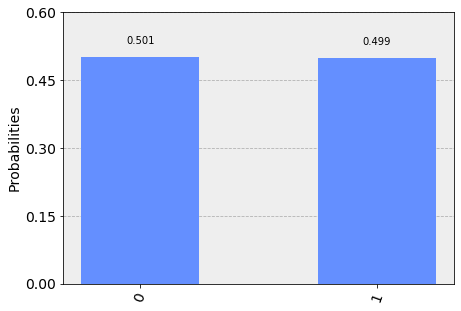

In [41]:
def exec(circ):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circ, simulator).result()
    counts = result.get_counts(circ)
    return plot_histogram(counts)
    
    
    ket = [0.75, 0.25]
qc = QuantumCircuit(1,1)
qc.measure(0,0)

qcx = qc + measure_x
qcz = qc + measure_z

exec(qcx)

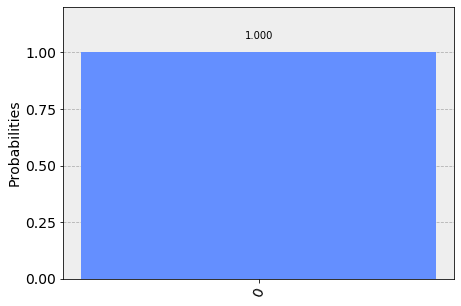

In [42]:
exec(qcz)

In [43]:
ket = [np.sqrt(0.25),np.sqrt(0.75)]

In [44]:
ket

[0.5, 0.8660254037844386]

In [45]:
# Question ID: 3
# Which of the following will load a state with 75% of outputs being 0, and 25% being 1?

# 1)  
# ket = [np.sqrt(0.25),np.sqrt(0.75)]
# 2)  
# ket = [np.sqrt(0.75),np.sqrt(0.25)]
# 3)  
# ket = [0.25,0.75]
# 4)  
# ket = [0.75,0.25]
# 5)  
# None of the above

[0.5+0.j  0. +0.5j 0.5+0.j  0. +0.5j]


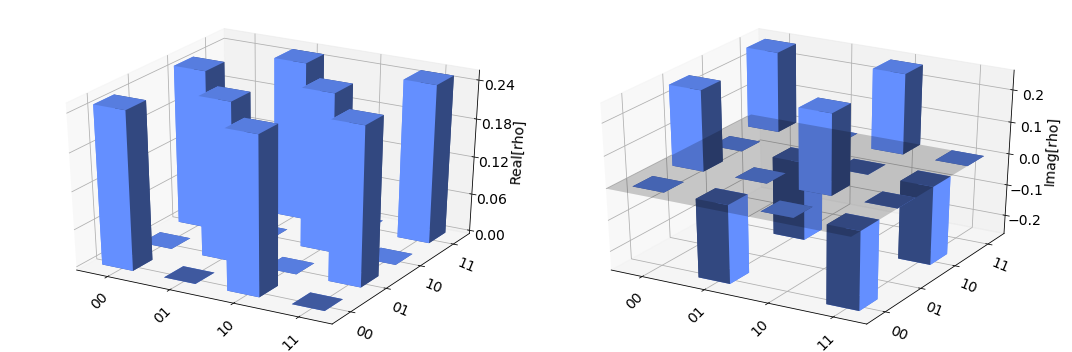

In [46]:
qc = QuantumCircuit(2, 2)
qc.h([0, 1])
qc.s(0)

backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [47]:
qc = QuantumCircuit(3)
qc.h([0,1,2])

backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]


In [48]:
qc = QuantumCircuit(2)
qc.x([0,1])
qc.z(0)

# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]


In [49]:
# Question ID: 4
# Which of these configuration options could result in the following result object/counts?

# Construct quantum circuit
circ = QuantumCircuit(2, 2)
circ.h([0,1])
circ.measure([0,1], [0,1])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get memory
result = execute(circ, simulator, memory=True, shots=15).result()
memory = result.get_memory(circ)
print(memory)

['01', '10', '11', '10', '01', '11', '01', '10', '01', '10', '11', '10', '00', '11', '10']


In [50]:
# Question ID: 5
# How do you create a circuit in the following state?

# 1)  

# qr = QuantumRegister(2)
# qc = QuantumCircuit(qr)
# qc.initialize([0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])

# 2)  

# qr = QuantumRegister(2, inital_state=[0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])
# qc = QuantumCircuit(qr)

# 3)  

# qr = QuantumRegister(2)
# qc = QuantumCircuit(qr, inital_state=[0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])

# 4)  

# qr = QuantumRegister(2)
# qc = QuantumCircuit(qr)
# qc.initialize([1, 0, 1, 0] / np.sqrt(2), [qr[0], qr[1]])

# 5)  
# None of the above

In [51]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.initialize([0, 1, 1, 0] / np.sqrt(2), [qr[0], qr[1]])

backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)


[0.   +0.j 0.707+0.j 0.707+0.j 0.   +0.j]


In [52]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.initialize([1, 0, 1, 0] / np.sqrt(2), [qr[0], qr[1]])

backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)


[0.707+0.j 0.   +0.j 0.707+0.j 0.   +0.j]


In [54]:
# from qiskit import *
# from qiskit.aqua.algorithms import Grover
# from qiskit.aqua.components.oracles import LogicalExpressionOracle

# expr = "your logical expression goes here"
# algorithm = Grover(LogicalExpressionOracle(expr))
# backend = BasicAer.get_backend('qasm_simulator')
# result = algorithm.run(backend, seed_simulator = 101110)

In [55]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [56]:


def phase_oracle(circuit, register):
    circuit.cz(qr[2],qr[0])
    circuit.cz(qr[2],qr[1])



In [57]:
def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)

In [58]:


def inversion_about_average(circuit, register, n, barriers):
    """Apply inversion about the average step of Grover's algorithm."""
    circuit.h(register)
    circuit.x(register)
    
    if barriers:
        circuit.barrier()
    
    n_controlled_Z(circuit, [register[j] for j in range(n-1)], register[n-1])
    
    if barriers:
        circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)



In [59]:


barriers = True

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

if barriers:
    groverCircuit.barrier()

phase_oracle(groverCircuit, qr)

if barriers:
    groverCircuit.barrier()

inversion_about_average(groverCircuit, qr, 3, barriers)

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr,cr)



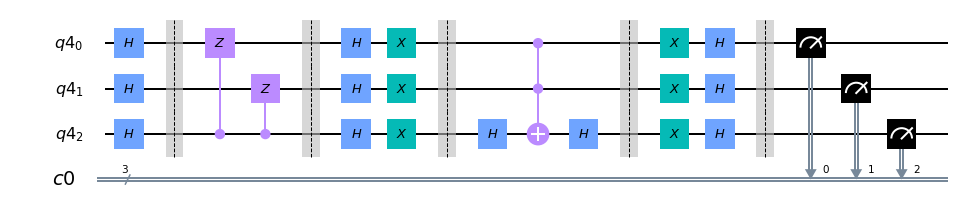

In [60]:
groverCircuit.draw(output="mpl")

In [64]:
from qiskit import *
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

expr = "your logical expression goes here"
algorithm = Grover(LogicalExpressionOracle(expr))
backend = BasicAer.get_backend('qasm_simulator')
result = algorithm.run(backend, seed_simulator = 101110)

ImportError: DLL load failed: The specified module could not be found.

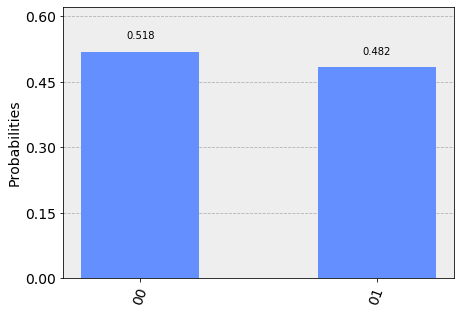

In [63]:
from qiskit import *

stuff = QuantumCircuit(2, 2)
stuff.h(0)
stuff.measure([0, 1], {0, 1})
exec(stuff)

In [ ]:
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle

expr = "your logical expression goes here"
algorithm = Grover(LogicalExpressionOracle(expr))
backend = BasicAer.get_backend('qasm_simulator')
result = algorithm.run(backend, seed_simulator = 101110)